# Filtragem dos dados

In [11]:
from PIL import Image
import os

# Caminho para as pastas de imagens (tanto degradadas quanto clean)
degraded_dir = 'Dataset/train/degraded'
clean_dir = 'Dataset/train/clean'

# Lista para armazenar imagens com menos de 3 canais
non_rgb_images = []

# Função para verificar o número de canais de uma imagem
def check_image_channels(image_path):
    image = Image.open(image_path)
    # Verificar se a imagem é RGB
    if image.mode != 'RGB':
        return image_path, image.mode  # Retorna o caminho e o modo (por exemplo, 'L' para grayscale)
    return None

# Verificar e armazenar as imagens não RGB no diretório 'clean'
for filename in os.listdir(clean_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(clean_dir, filename)
        result = check_image_channels(image_path)
        if result:
            non_rgb_images.append(filename)

In [14]:
from PIL import Image
import os
import matplotlib.pyplot as plt

# Diretório onde as imagens estão
clean_dir = 'Dataset/train/clean'

# Lista para armazenar caminhos de imagens com menos de 3 canais
non_rgb_images = []

# Verifica se as imagens no diretório não são RGB
for filename in os.listdir(clean_dir):
    img_path = os.path.join(clean_dir, filename)
    try:
        with Image.open(img_path) as img:
            if img.mode != 'RGB':
                non_rgb_images.append(img_path)  # Armazenar o caminho completo da imagem
    except Exception as e:
        print(f"Erro ao abrir {filename}: {e}")

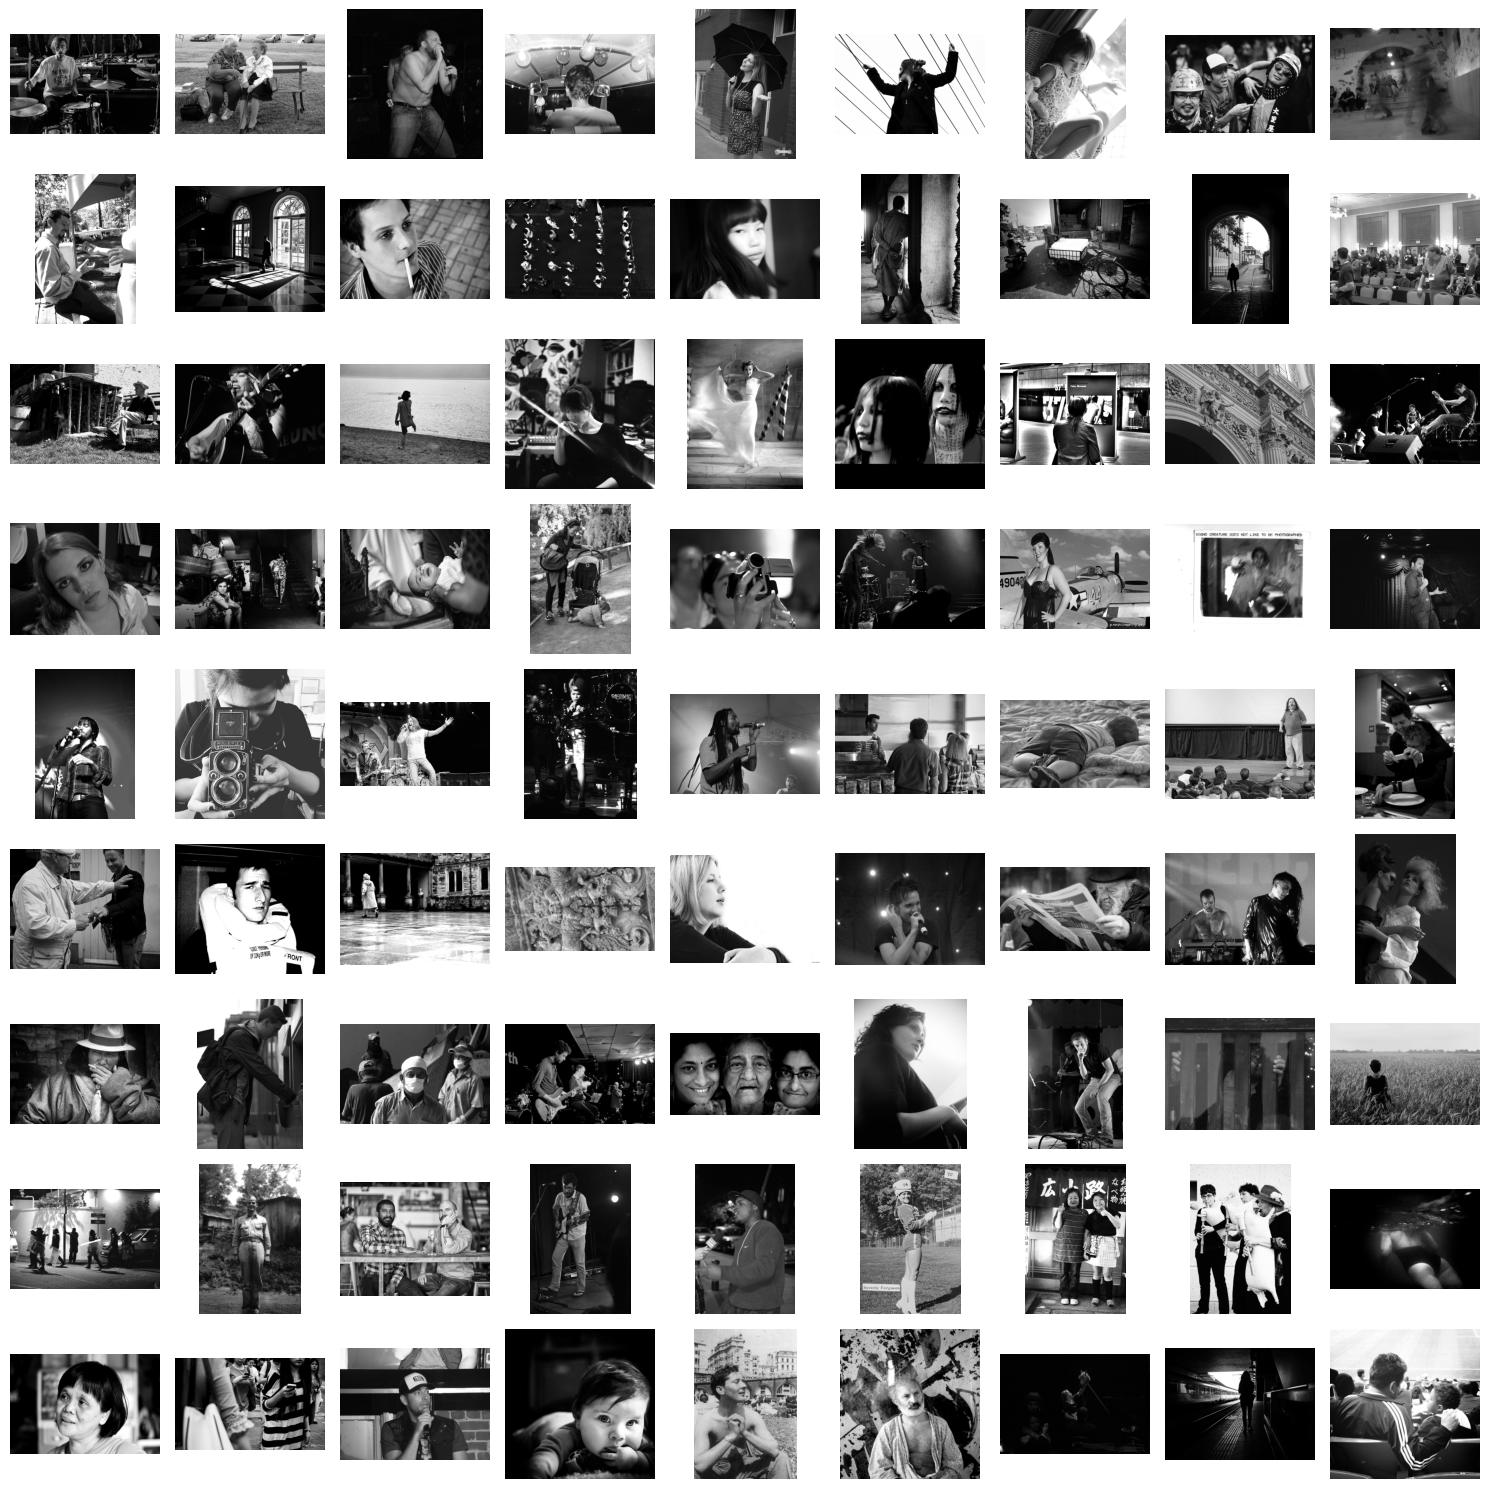

In [15]:
# Se existirem imagens não RGB, cria um grid 9x9
if non_rgb_images:
    # Definir a grade 9x9
    fig, axes = plt.subplots(9, 9, figsize=(15, 15))

    for i, img_path in enumerate(non_rgb_images[:81]):  # Limitar a 81 imagens
        try:
            # Abrir a imagem
            img = Image.open(img_path)
            img.load()

            # Exibir a imagem no grid
            row = i // 9
            col = i % 9
            axes[row, col].imshow(img, cmap='gray' if img.mode != 'RGB' else None)
            axes[row, col].axis('off')  # Remover os eixos
        except Exception as e:
            print(f"Erro ao processar a imagem {img_path}: {e}")
            continue  # Pular imagens que derem erro

    # Ajustar o layout e exibir o grid no Jupyter
    plt.tight_layout()
    plt.show()
else:
    print("Nenhuma imagem não RGB foi encontrada no diretório.")

## Deletando essas imagens preto e branco do dataset

In [16]:
# Excluir as imagens não RGB encontradas no diretório
for img_path in non_rgb_images:
    try:
        os.remove(img_path)
        print(f"Imagem {img_path} deletada com sucesso.")
    except Exception as e:
        print(f"Erro ao deletar {img_path}: {e}")

Erro ao deletar Dataset/train/clean\000fba5c3e5ad3fd.jpg: [WinError 32] O arquivo já está sendo usado por outro processo: 'Dataset/train/clean\\000fba5c3e5ad3fd.jpg'
Imagem Dataset/train/clean\00164d730e5a8a8d.jpg deletada com sucesso.
Imagem Dataset/train/clean\001d650c55cbb338.jpg deletada com sucesso.
Imagem Dataset/train/clean\00a5aeb8f12ca23e.jpg deletada com sucesso.
Imagem Dataset/train/clean\0277fd03aa57f423.jpg deletada com sucesso.
Imagem Dataset/train/clean\02ad7bce27920f65.jpg deletada com sucesso.
Imagem Dataset/train/clean\02cc341ab544798a.jpg deletada com sucesso.
Imagem Dataset/train/clean\03632a1dcc1cb4ac.jpg deletada com sucesso.
Imagem Dataset/train/clean\03776d955734ab34.jpg deletada com sucesso.
Imagem Dataset/train/clean\03f4b95952e1edf4.jpg deletada com sucesso.
Imagem Dataset/train/clean\04a0801fe476c128.jpg deletada com sucesso.
Imagem Dataset/train/clean\051b2b5566445f52.jpg deletada com sucesso.
Imagem Dataset/train/clean\05ae5f5728208862.jpg deletada com suc

In [17]:
# Contar o número de imagens restantes no diretório
remaining_images = os.listdir(clean_dir)
num_remaining_images = len(remaining_images)

print(f"Restam {num_remaining_images} imagens no diretório '{clean_dir}'.")

Restam 9612 imagens no diretório 'Dataset/train/clean'.


## Redimensionamento

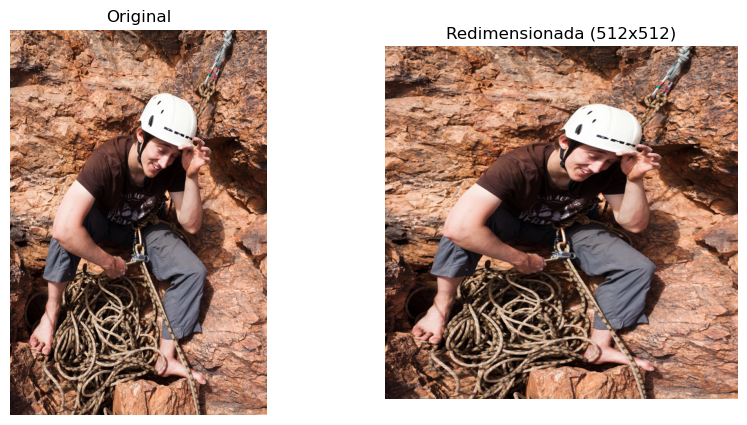

In [19]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Diretório das imagens
clean_dir = 'Dataset/train/clean'

# Selecionar uma imagem do dataset
image_name = os.listdir(clean_dir)[0]  # Pegar a primeira imagem da lista
image_path = os.path.join(clean_dir, image_name)

# Abrir a imagem original
original_img = Image.open(image_path)

# Redimensionar a imagem para 256x256
resized_img = original_img.resize((512, 512))

# Exibir a imagem original e a redimensionada lado a lado
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Mostrar a imagem original
ax[0].imshow(original_img)
ax[0].set_title("Original")
ax[0].axis('off')

# Mostrar a imagem redimensionada
ax[1].imshow(resized_img)
ax[1].set_title("Redimensionada (512x512)")
ax[1].axis('off')

# Exibir o gráfico
plt.show()


In [20]:
# Redimensionar todas as imagens no diretório para 256x256 e salvar no mesmo lugar
for filename in os.listdir(clean_dir):
    img_path = os.path.join(clean_dir, filename)
    try:
        # Abrir a imagem
        with Image.open(img_path) as img:
            # Redimensionar para 256x256
            resized_img = img.resize((512, 512))
            # Salvar no mesmo caminho, substituindo a original
            resized_img.save(img_path)
            print(f"Imagem {filename} redimensionada e salva.")
    except Exception as e:
        print(f"Erro ao processar {filename}: {e}")

Imagem 00010f041a2a6fa5.jpg redimensionada e salva.
Imagem 0001e27f4b156f49.jpg redimensionada e salva.
Imagem 000266c1e4c17092.jpg redimensionada e salva.
Imagem 00026c718db23b72.jpg redimensionada e salva.
Imagem 0002e0d9c42c2d60.jpg redimensionada e salva.
Imagem 000358e0e71d47d9.jpg redimensionada e salva.
Imagem 0003f7ea775517bc.jpg redimensionada e salva.
Imagem 00042ac6c8d13cb1.jpg redimensionada e salva.
Imagem 00043d963ac134df.jpg redimensionada e salva.
Imagem 000448f180ca3a76.jpg redimensionada e salva.
Imagem 0004e97f948b7942.jpg redimensionada e salva.
Imagem 000618b306eca1c9.jpg redimensionada e salva.
Imagem 00062fd13de3786c.jpg redimensionada e salva.
Imagem 0006ac4a96b73978.jpg redimensionada e salva.
Imagem 000747cad5f15105.jpg redimensionada e salva.
Imagem 0007a0dde58cd382.jpg redimensionada e salva.
Imagem 00085221ca94c7ed.jpg redimensionada e salva.
Imagem 0008d5a882b83cbe.jpg redimensionada e salva.
Imagem 00090aa6938b7de9.jpg redimensionada e salva.
Imagem 00096

In [21]:
# Contar o número de imagens restantes no diretório
remaining_images = os.listdir(clean_dir)
num_remaining_images = len(remaining_images)

print(f"Restam {num_remaining_images} imagens no diretório '{clean_dir}'.")

Restam 9612 imagens no diretório 'Dataset/train/clean'.


# Aplicando a Degradação

In [22]:
import cv2
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
import os
import matplotlib.pyplot as plt

# Função para adicionar ruído gaussiano
def add_gaussian_noise(image):
    row, col, ch = image.shape
    mean = 0
    sigma = 25  # Pode ajustar este valor para mais ou menos ruído
    gauss = np.random.normal(mean, sigma, (row, col, ch)).reshape(row, col, ch)
    noisy_image = image + gauss
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Função para desbotar as cores
def fade_colors(image):
    enhancer = ImageEnhance.Color(image)
    return enhancer.enhance(0.05)  # Diminui a saturação

# Função para aplicar desfoque
def add_blur(image):
    return image.filter(ImageFilter.GaussianBlur(radius=1))  # Ajuste o valor do radius

# Função principal para aplicar degradações
def degrade_image(image_path):
    image = Image.open(image_path)

    image_cv = cv2.imread(image_path)

    # Aplicar várias degradações
    noisy_image = add_gaussian_noise(image_cv)  # Ruído
    noisy_image_pil = Image.fromarray(noisy_image)
    faded_image = fade_colors(noisy_image_pil)  # Desbotar cores
    blurred_image = add_blur(faded_image)  # Desfoque

    return image, blurred_image

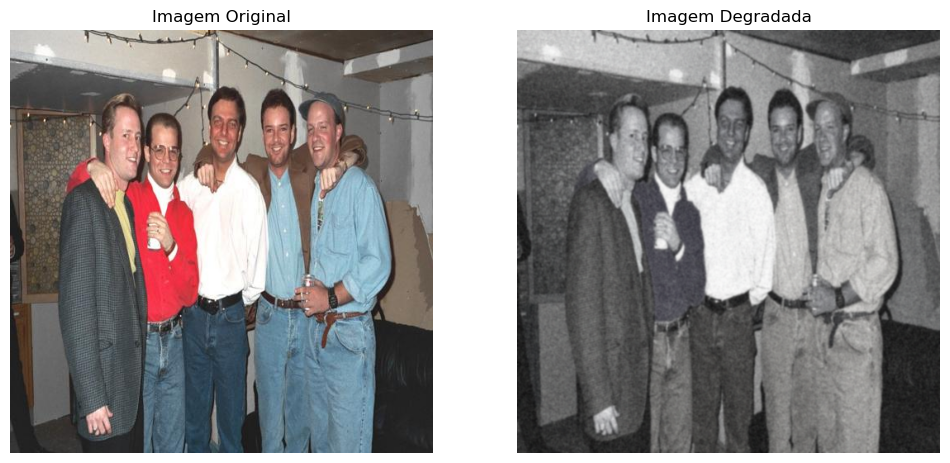

In [25]:
# Testar com uma imagem específica
image_path = 'Dataset/train/clean/0a1a43775bc3d544.jpg'

# Obter a imagem original e a degradada
original_image, degraded_image = degrade_image(image_path)

# Exibir a imagem original e a imagem degradada
plt.figure(figsize=(12, 6))

# Imagem original
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Imagem Original')
plt.axis('off')

# Imagem degradada
plt.subplot(1, 2, 2)
plt.imshow(degraded_image)
plt.title('Imagem Degradada')
plt.axis('off')

plt.show()


In [26]:
# Caminho para as pastas
clean_images_path = 'Dataset/train/clean/'
degraded_images_path = 'Dataset/train/degraded/'

# Certificar que a pasta degraded existe
os.makedirs(degraded_images_path, exist_ok=True)

# Aplicar degradação a todas as imagens na pasta 'clean'
for filename in os.listdir(clean_images_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(clean_images_path, filename)
        _, degraded_image = degrade_image(image_path)
        
        # Salvar a imagem degradada
        degraded_image.save(os.path.join(degraded_images_path, filename))

print("Todas as imagens foram degradadas e salvas.")

Todas as imagens foram degradadas e salvas.


# Criando o modelo

# Discriminador

In [1]:
import tensorflow as tf

# Função para construir o discriminador
def get_discriminator_model():
    layers = [
        tf.keras.layers.Conv2D(32, kernel_size=(7, 7), strides=1, activation='relu', input_shape=(256, 256, 3)),
        tf.keras.layers.Conv2D(32, kernel_size=(7, 7), strides=1, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, kernel_size=(5, 5), strides=1, activation='relu'),
        tf.keras.layers.Conv2D(64, kernel_size=(5, 5), strides=1, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu'),
        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(256, kernel_size=(3, 3), strides=1, activation='relu'),
        tf.keras.layers.Conv2D(256, kernel_size=(3, 3), strides=1, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
    model = tf.keras.models.Sequential(layers)
    return model

# Gerador

In [2]:
# Função para construir o gerador
def get_generator_model():
    inputs = tf.keras.layers.Input(shape=(512, 512, 1))  # Se for grayscale, 1 canal; caso contrário, mude para 3 para RGB

    # Camadas convolucionais
    conv1 = tf.keras.layers.Conv2D(16, kernel_size=(5, 5), strides=1)(inputs)
    conv1 = tf.keras.layers.LeakyReLU()(conv1)
    conv1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), strides=1)(conv1)
    conv1 = tf.keras.layers.LeakyReLU()(conv1)
    conv1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), strides=1)(conv1)
    conv1 = tf.keras.layers.LeakyReLU()(conv1)

    conv2 = tf.keras.layers.Conv2D(32, kernel_size=(5, 5), strides=1)(conv1)
    conv2 = tf.keras.layers.LeakyReLU()(conv2)
    conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=1)(conv2)
    conv2 = tf.keras.layers.LeakyReLU()(conv2)
    conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=1)(conv2)
    conv2 = tf.keras.layers.LeakyReLU()(conv2)

    conv3 = tf.keras.layers.Conv2D(64, kernel_size=(5, 5), strides=1)(conv2)
    conv3 = tf.keras.layers.LeakyReLU()(conv3)
    conv3 = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=1)(conv3)
    conv3 = tf.keras.layers.LeakyReLU()(conv3)
    conv3 = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=1)(conv3)
    conv3 = tf.keras.layers.LeakyReLU()(conv3)

    bottleneck = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=1, activation='tanh', padding='same')(conv3)

    # Camadas de saída do gerador
    concat_1 = tf.keras.layers.Concatenate()([bottleneck, conv3])
    conv_up_3 = tf.keras.layers.Conv2DTranspose(128, kernel_size=(3, 3), strides=1, activation='relu')(concat_1)
    conv_up_3 = tf.keras.layers.Conv2DTranspose(128, kernel_size=(3, 3), strides=1, activation='relu')(conv_up_3)
    conv_up_3 = tf.keras.layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=1, activation='relu')(conv_up_3)

    concat_2 = tf.keras.layers.Concatenate()([conv_up_3, conv2])
    conv_up_2 = tf.keras.layers.Conv2DTranspose(64, kernel_size=(3, 3), strides=1, activation='relu')(concat_2)
    conv_up_2 = tf.keras.layers.Conv2DTranspose(64, kernel_size=(3, 3), strides=1, activation='relu')(conv_up_2)
    conv_up_2 = tf.keras.layers.Conv2DTranspose(32, kernel_size=(5, 5), strides=1, activation='relu')(conv_up_2)

    concat_3 = tf.keras.layers.Concatenate()([conv_up_2, conv1])
    conv_up_1 = tf.keras.layers.Conv2DTranspose(32, kernel_size=(3, 3), strides=1, activation='relu')(concat_3)
    conv_up_1 = tf.keras.layers.Conv2DTranspose(32, kernel_size=(3, 3), strides=1, activation='relu')(conv_up_1)
    conv_up_1 = tf.keras.layers.Conv2DTranspose(3, kernel_size=(5, 5), strides=1, activation='relu')(conv_up_1)  # Para gerar RGB

    model = tf.keras.models.Model(inputs, conv_up_1)
    return model


## Perda dos Modelos

In [3]:
# Funções de perda
cross_entropy = tf.keras.losses.BinaryCrossentropy()
mse = tf.keras.losses.MeanSquaredError()

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output) - tf.random.uniform(shape=real_output.shape, maxval=0.1), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output) + tf.random.uniform(shape=fake_output.shape, maxval=0.1), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output, real_y):
    real_y = tf.cast(real_y, 'float32')
    return mse(fake_output, real_y)

# Otimizadores
generator_optimizer = tf.keras.optimizers.Adam(0.0005)
discriminator_optimizer = tf.keras.optimizers.Adam(0.0005)

# Construir os modelos
generator = get_generator_model()
discriminator = get_discriminator_model()

# Treinamento

In [14]:
import tensorflow as tf
import os
from PIL import Image
import numpy as np

# Diretórios de imagens degradadas e não degradadas
degraded_dir = 'Dataset/train/degraded'
clean_dir = 'Dataset/train/clean'

# Parâmetros
image_size = (512, 512)
batch_size = 8

# Função para carregar e redimensionar uma imagem
def load_image(image_path):
    img = Image.open(image_path)
    img = img.resize(image_size)
    img = np.array(img) / 255.0  # Normalizar para [0, 1]
    return img

# Função para carregar o dataset de imagens degradadas e não degradadas
def load_dataset(degraded_dir, clean_dir):
    degraded_images = []
    clean_images = []

    for filename in os.listdir(degraded_dir):
        degraded_img_path = os.path.join(degraded_dir, filename)
        clean_img_path = os.path.join(clean_dir, filename)  # Assumindo que os arquivos tenham o mesmo nome

        degraded_img = load_image(degraded_img_path)
        clean_img = load_image(clean_img_path)

        degraded_images.append(degraded_img)
        clean_images.append(clean_img)

    return np.array(degraded_images), np.array(clean_images)

# Carregar as imagens degradadas e não degradadas
x_data, y_data = load_dataset(degraded_dir, clean_dir)

# Verificar o formato dos dados
print(f"Formato das imagens degradadas: {x_data.shape}")
print(f"Formato das imagens não degradadas: {y_data.shape}")


KeyboardInterrupt: 

In [14]:
# Função de treino
@tf.function
def train_step(input_x, real_y):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(input_x, training=True)
        real_output = discriminator(real_y, training=True)
        generated_output = discriminator(generated_images, training=True)
        
        gen_loss = generator_loss(generated_images, real_y)
        disc_loss = discriminator_loss(real_output, generated_output)
        
        # Calcular gradientes e atualizar os pesos
        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

# Treinamento
num_epochs = 150
losses = {"D": [], "G": []}

# Aqui, 'dataset' precisa ser definido como um iterador com seus dados (imagens degradadas e reais)
for epoch in range(num_epochs):
    print(f"Running epoch: {epoch}")
    for (x, y) in dataset:  # x = imagem degradada, y = imagem não degradada
        gen_loss, disc_loss = train_step(x, y)
        losses["D"].append(disc_loss.numpy())
        losses["G"].append(gen_loss.numpy())

ValueError: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([])) is deprecated. Please ensure they have the same size.

# Modelo simplificado

In [1]:
import torch

print("CUDA disponível:", torch.cuda.is_available())
print("Número de GPUs disponíveis:", torch.cuda.device_count())
print("Nome da GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "Nenhuma GPU disponível")


CUDA disponível: True
Número de GPUs disponíveis: 1
Nome da GPU: NVIDIA GeForce GTX 1050 Ti


In [1]:
# Importar as bibliotecas necessárias
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.utils import save_image
from PIL import Image

# Definir o conjunto de dados personalizado
class ImageDataset(Dataset):
    def __init__(self, degraded_dir, clean_dir, transform=None):
        self.degraded_dir = degraded_dir
        self.clean_dir = clean_dir
        self.transform = transform
        self.degraded_images = sorted(os.listdir(degraded_dir))
        self.clean_images = sorted(os.listdir(clean_dir))
        
    def __len__(self):
        return len(self.degraded_images)
    
    def __getitem__(self, idx):
        degraded_path = os.path.join(self.degraded_dir, self.degraded_images[idx])
        clean_path = os.path.join(self.clean_dir, self.clean_images[idx])

        degraded_image = Image.open(degraded_path).convert('RGB')
        clean_image = Image.open(clean_path).convert('RGB')

        if self.transform:
            degraded_image = self.transform(degraded_image)
            clean_image = self.transform(clean_image)
        
        return degraded_image, clean_image

# Definir as transformações e carregar os dados
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)  # Normaliza para o intervalo [-1, 1]
])

dataset = ImageDataset(
    degraded_dir='Dataset/train/degraded',
    clean_dir='Dataset/train/clean',
    transform=transform
)

dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Definir a arquitetura do Gerador
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # Encoder
            nn.Conv2d(3, 64, 4, 2, 1),    # [B, 64, 128, 128]
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1),  # [B, 128, 64, 64]
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1), # [B, 256, 32, 32]
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            # Decoder
            nn.ConvTranspose2d(256, 128, 4, 2, 1), # [B, 128, 64, 64]
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),  # [B, 64, 128, 128]
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1),    # [B, 3, 256, 256]
            nn.Tanh()
        )
    
    def forward(self, x):
        return self.main(x)

# Definir a arquitetura do Discriminador ajustado
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # Entrada: [B, 3, 256, 256]
            nn.Conv2d(3, 64, 4, 2, 1),    # [B, 64, 128, 128]
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1),  # [B, 128, 64, 64]
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1), # [B, 256, 32, 32]
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1), # [B, 512, 16, 16]
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, 4, 1, 0),   # [B, 1, 13, 13]
            nn.Sigmoid()
        )
    
    def forward(self, x):
        out = self.main(x)
        # Achatar as dimensões espaciais e calcular a média
        return out.view(x.size(0), -1).mean(1)

# Inicializar os modelos, critérios de perda e otimizadores
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Usando dispositivo:", device)

generator = Generator().to(device)
discriminator = Discriminator().to(device)

criterion_GAN = nn.BCELoss()
criterion_pixelwise = nn.L1Loss()

optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Loop de treinamento
num_epochs = 40

for epoch in range(num_epochs):
    for i, (degraded_images, clean_images) in enumerate(dataloader):
        degraded_images = degraded_images.to(device)
        clean_images = clean_images.to(device)

        # Labels reais e falsos
        real_labels = torch.ones(degraded_images.size(0), device=device)
        fake_labels = torch.zeros(degraded_images.size(0), device=device)

        # ------------------
        #  Treinar o Gerador
        # ------------------
        optimizer_G.zero_grad()

        # Gerar imagens
        gen_images = generator(degraded_images)

        # Perda adversarial do Gerador
        validity = discriminator(gen_images)
        g_loss_GAN = criterion_GAN(validity, real_labels)

        # Perda de similaridade (pixel-wise)
        g_loss_pixel = criterion_pixelwise(gen_images, clean_images)

        # Perda total do Gerador
        g_loss = g_loss_GAN + 100 * g_loss_pixel  # O peso 100 equilibra as perdas

        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        #  Treinar o Discriminador
        # ---------------------
        optimizer_D.zero_grad()

        # Perda do Discriminador com imagens reais
        real_pred = discriminator(clean_images)
        d_real_loss = criterion_GAN(real_pred, real_labels)

        # Perda do Discriminador com imagens falsas
        fake_pred = discriminator(gen_images.detach())
        d_fake_loss = criterion_GAN(fake_pred, fake_labels)

        # Perda total do Discriminador
        d_loss = (d_real_loss + d_fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

        # Exibir o progresso
        if i % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}] Batch {i}/{len(dataloader)} "
                  f"Loss D: {d_loss.item():.4f}, Loss G: {g_loss.item():.4f}")

    # Salvar algumas imagens geradas para visualização
    os.makedirs('images', exist_ok=True)
    def denormalize(tensors):
        return tensors * 0.5 + 0.5  # Redimensiona para o intervalo [0,1]

    save_image(denormalize(gen_images.data[:25]), f"images/{epoch+1}.png", nrow=5)

# Salvar os modelos treinados
torch.save(generator.state_dict(), 'generator.pth')
torch.save(discriminator.state_dict(), 'discriminator.pth')


Usando dispositivo: cuda
Epoch [1/40] Batch 0/601 Loss D: 0.7070, Loss G: 64.5812
Epoch [1/40] Batch 100/601 Loss D: 0.6795, Loss G: 14.8814
Epoch [1/40] Batch 200/601 Loss D: 0.4592, Loss G: 13.8697
Epoch [1/40] Batch 300/601 Loss D: 0.6411, Loss G: 14.0607
Epoch [1/40] Batch 400/601 Loss D: 0.6650, Loss G: 13.2373
Epoch [1/40] Batch 500/601 Loss D: 0.7257, Loss G: 9.5291
Epoch [1/40] Batch 600/601 Loss D: 0.5526, Loss G: 9.9100
Epoch [2/40] Batch 0/601 Loss D: 0.5772, Loss G: 10.6094
Epoch [2/40] Batch 100/601 Loss D: 0.5626, Loss G: 9.7546
Epoch [2/40] Batch 200/601 Loss D: 0.6741, Loss G: 11.7648
Epoch [2/40] Batch 300/601 Loss D: 0.6434, Loss G: 10.5202
Epoch [2/40] Batch 400/601 Loss D: 0.5687, Loss G: 9.0114
Epoch [2/40] Batch 500/601 Loss D: 0.6096, Loss G: 9.6732
Epoch [2/40] Batch 600/601 Loss D: 0.5978, Loss G: 9.0918
Epoch [3/40] Batch 0/601 Loss D: 0.7047, Loss G: 9.3952
Epoch [3/40] Batch 100/601 Loss D: 0.6284, Loss G: 9.6189
Epoch [3/40] Batch 200/601 Loss D: 0.5054, Lo

In [2]:
# Function to load an image
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)
    return image

# Function to save a tensor as an image
def save_image(tensor, filename):
    image = tensor.squeeze(0).cpu().detach()
    image = image * 0.5 + 0.5  # Denormalize to [0,1]
    image = transforms.ToPILImage()(image)
    image.save(filename)


# Path to a degraded image
degraded_image_path = 'Dataset/train/degraded/0a5ae9ef75c60032.jpg'

# Load and preprocess the degraded image
degraded_image = load_image(degraded_image_path)

# Generate the restored image
with torch.no_grad():
    restored_image = generator(degraded_image)

In [4]:
# Save the restored image
save_image(restored_image, 'restored_image.jpg')


# Versão Tunada V1

In [1]:
import os
import time
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms
from tqdm import tqdm


In [3]:
# Importar as bibliotecas necessárias
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.utils import save_image
from PIL import Image

# Definir o conjunto de dados personalizado
class ImageDataset(Dataset):
    def __init__(self, degraded_dir, clean_dir, transform=None):
        self.degraded_dir = degraded_dir
        self.clean_dir = clean_dir
        self.transform = transform
        self.degraded_images = sorted(os.listdir(degraded_dir))
        self.clean_images = sorted(os.listdir(clean_dir))
        
    def __len__(self):
        return len(self.degraded_images)
    
    def __getitem__(self, idx):
        degraded_path = os.path.join(self.degraded_dir, self.degraded_images[idx])
        clean_path = os.path.join(self.clean_dir, self.clean_images[idx])

        degraded_image = Image.open(degraded_path).convert('RGB')
        clean_image = Image.open(clean_path).convert('RGB')

        if self.transform:
            degraded_image = self.transform(degraded_image)
            clean_image = self.transform(clean_image)
        
        return degraded_image, clean_image

# Definir as transformações e carregar os dados
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)  # Normaliza para o intervalo [-1, 1]
])

dataset = ImageDataset(
    degraded_dir='Dataset/train/degraded',
    clean_dir='Dataset/train/clean',
    transform=transform
)

# Definindo batch size semelhante ao que funcionou
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

In [2]:
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.utils import save_image, make_grid
from PIL import Image
import time

# Definir o conjunto de dados personalizado
class ImageDataset(Dataset):
    def __init__(self, degraded_dir, clean_dir, transform=None):
        self.degraded_dir = degraded_dir
        self.clean_dir = clean_dir
        self.transform = transform
        self.degraded_images = sorted(os.listdir(degraded_dir))
        self.clean_images = sorted(os.listdir(clean_dir))
        
    def __len__(self):
        return len(self.degraded_images)
    
    def __getitem__(self, idx):
        degraded_path = os.path.join(self.degraded_dir, self.degraded_images[idx])
        clean_path = os.path.join(self.clean_dir, self.clean_images[idx])

        degraded_image = Image.open(degraded_path).convert('RGB')
        clean_image = Image.open(clean_path).convert('RGB')

        if self.transform:
            degraded_image = self.transform(degraded_image)
            clean_image = self.transform(clean_image)
        
        return degraded_image, clean_image

# Definir as transformações e carregar os dados
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)  # Normaliza para o intervalo [-1, 1]
])

dataset = ImageDataset(
    degraded_dir='Dataset/train/degraded',
    clean_dir='Dataset/train/clean',
    transform=transform
)

dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Definir a arquitetura do Gerador
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # Encoder
            nn.Conv2d(3, 64, 4, 2, 1),    # [B, 64, 128, 128]
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1),  # [B, 128, 64, 64]
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1), # [B, 256, 32, 32]
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1), # [B, 512, 16, 16]
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 1024, 4, 2, 1),# [B, 1024, 8, 8]
            nn.BatchNorm2d(1024),
            nn.ReLU(inplace=True),
            # Decoder
            nn.ConvTranspose2d(1024, 512, 4, 2, 1), # [B, 512, 16, 16]
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1), # [B, 256, 32, 32]
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1), # [B, 128, 64, 64]
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),  # [B, 64, 128, 128]
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1),    # [B, 3, 256, 256]
            nn.Tanh()
        )
    
    def forward(self, x):
        return self.main(x)

# Definir a arquitetura do Discriminador
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # Entrada: [B, 3, 256, 256]
            nn.Conv2d(3, 64, 4, 2, 1),    # [B, 64, 128, 128]
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1),  # [B, 128, 64, 64]
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1), # [B, 256, 32, 32]
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1), # [B, 512, 16, 16]
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1024, 4, 2, 1), # [B, 1024, 8, 8]
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(1024, 1, 4, 1, 0),   # [B, 1, 5, 5]
            nn.Sigmoid()
        )
    
    def forward(self, x):
        out = self.main(x)
        # Achatar as dimensões espaciais e calcular a média
        return out.view(x.size(0), -1).mean(1)

# Inicializar os modelos, critérios de perda e otimizadores
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Usando dispositivo:", device)

generator = Generator().to(device)
discriminator = Discriminator().to(device)

criterion_GAN = nn.BCELoss()
criterion_pixelwise = nn.L1Loss()

optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Função para salvar 3 imagens em um grid 3x3 (degradada, gerada, original)
def save_image_comparison(epoch, degraded_images, gen_images, clean_images):
    os.makedirs('images', exist_ok=True)
    comparison = torch.cat([degraded_images[:3], gen_images[:3], clean_images[:3]], dim=0)
    grid = make_grid(comparison, nrow=3, normalize=True)
    save_image(grid, f"images/comparison_epoch_{epoch+1}.png")

# Loop de treinamento com limite de tempo
num_epochs = 100
max_training_time = 3600 * 4  # 5 horas de treinamento no máximo
start_time = time.time()

for epoch in range(num_epochs):
    if time.time() - start_time > max_training_time:
        print(f"\nTempo máximo de treinamento atingido ({max_training_time} segundos). Encerrando...")
        break

    for i, (degraded_images, clean_images) in enumerate(dataloader):
        degraded_images = degraded_images.to(device)
        clean_images = clean_images.to(device)

        # Labels reais e falsos
        real_labels = torch.ones(degraded_images.size(0), device=device)
        fake_labels = torch.zeros(degraded_images.size(0), device=device)

        # ------------------
        #  Treinar o Gerador
        # ------------------
        optimizer_G.zero_grad()

        # Gerar imagens
        gen_images = generator(degraded_images)

        # Perda adversarial do Gerador
        validity = discriminator(gen_images)
        g_loss_GAN = criterion_GAN(validity, real_labels)

        # Perda de similaridade (pixel-wise)
        g_loss_pixel = criterion_pixelwise(gen_images, clean_images)

        # Perda total do Gerador
        g_loss = g_loss_GAN + 100 * g_loss_pixel  # O peso 100 equilibra as perdas

        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        #  Treinar o Discriminador
        # ---------------------
        optimizer_D.zero_grad()

        # Perda do Discriminador com imagens reais
        real_pred = discriminator(clean_images)
        d_real_loss = criterion_GAN(real_pred, real_labels)

        # Perda do Discriminador com imagens falsas
        fake_pred = discriminator(gen_images.detach())
        d_fake_loss = criterion_GAN(fake_pred, fake_labels)

        # Perda total do Discriminador
        d_loss = (d_real_loss + d_fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

        # Exibir o progresso
        if i % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}] Batch {i}/{len(dataloader)} "
                  f"Loss D: {d_loss.item():.4f}, Loss G: {g_loss.item():.4f}")

    # Salvar comparação de imagens ao final de cada época
    save_image_comparison(epoch, degraded_images, gen_images, clean_images)

# Salvar os modelos treinados
torch.save(generator.state_dict(), 'generator.pth')
torch.save(discriminator.state_dict(), 'discriminator.pth')

Usando dispositivo: cuda
Epoch [1/100] Batch 0/601 Loss D: 0.6904, Loss G: 68.5016
Epoch [1/100] Batch 100/601 Loss D: 0.4876, Loss G: 23.3418


KeyboardInterrupt: 

# Versão Tunada V2

In [4]:
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.utils import save_image
from PIL import Image
import random

# Definir o conjunto de dados personalizado
class ImageDataset(Dataset):
    def __init__(self, degraded_dir, clean_dir, transform=None):
        self.degraded_dir = degraded_dir
        self.clean_dir = clean_dir
        self.transform = transform
        self.degraded_images = sorted(os.listdir(degraded_dir))
        self.clean_images = sorted(os.listdir(clean_dir))
        
    def __len__(self):
        return len(self.degraded_images)
    
    def __getitem__(self, idx):
        degraded_path = os.path.join(self.degraded_dir, self.degraded_images[idx])
        clean_path = os.path.join(self.clean_dir, self.clean_images[idx])

        degraded_image = Image.open(degraded_path).convert('RGB')
        clean_image = Image.open(clean_path).convert('RGB')

        if self.transform:
            degraded_image = self.transform(degraded_image)
            clean_image = self.transform(clean_image)
        
        return degraded_image, clean_image

# Definir as transformações e carregar os dados
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)  # Normaliza para o intervalo [-1, 1]
])

dataset = ImageDataset(
    degraded_dir='Dataset/train/degraded',
    clean_dir='Dataset/train/clean',
    transform=transform
)

dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Definir a arquitetura do Gerador
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1),  # [B, 16, 252, 252]
            nn.LeakyReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=1), # [B, 32, 250, 250]
            nn.LeakyReLU(),
            nn.Conv2d(32, 32, kernel_size=3, stride=1), # [B, 32, 248, 248]
            nn.LeakyReLU(),
            nn.Conv2d(32, 32, kernel_size=5, stride=1), # [B, 32, 244, 244]
            nn.LeakyReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1), # [B, 64, 242, 242]
            nn.LeakyReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1), # [B, 64, 240, 240]
            nn.LeakyReLU(),
            nn.Conv2d(64, 64, kernel_size=5, stride=1), # [B, 64, 236, 236]
            nn.LeakyReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=1),# [B, 128, 234, 234]
            nn.LeakyReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1),# [B, 128, 232, 232]
            nn.LeakyReLU()
        )
        
        self.bottleneck = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1) # [B, 128, 232, 232]

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 128, kernel_size=3, stride=1), # [B, 128, 234, 234]
            nn.ReLU(),
            nn.ConvTranspose2d(128, 128, kernel_size=3, stride=1), # [B, 128, 236, 236]
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=5, stride=1),  # [B, 64, 240, 240]
            nn.ReLU(),
            nn.ConvTranspose2d(64, 64, kernel_size=3, stride=1),   # [B, 64, 242, 242]
            nn.ReLU(),
            nn.ConvTranspose2d(64, 64, kernel_size=3, stride=1),   # [B, 64, 244, 244]
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=5, stride=1),   # [B, 32, 248, 248]
            nn.ReLU(),
            nn.ConvTranspose2d(32, 32, kernel_size=3, stride=1),   # [B, 32, 250, 250]
            nn.ReLU(),
            nn.ConvTranspose2d(32, 32, kernel_size=3, stride=1),   # [B, 32, 252, 252]
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=5, stride=1),    # [B, 3, 256, 256]
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.bottleneck(x)
        return self.decoder(x)

# Definir a arquitetura do Discriminador ajustado
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=7, stride=1),  # [B, 32, 250, 250]
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=7, stride=1), # [B, 32, 244, 244]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),                # [B, 32, 122, 122]
            nn.Conv2d(32, 64, kernel_size=5, stride=1), # [B, 64, 118, 118]
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=5, stride=1), # [B, 64, 114, 114]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),                # [B, 64, 57, 57]
            nn.Conv2d(64, 128, kernel_size=3, stride=1),# [B, 128, 55, 55]
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1),# [B, 128, 53, 53]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),                # [B, 128, 26, 26]
            nn.Conv2d(128, 256, kernel_size=3, stride=1),# [B, 256, 24, 24]
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1),# [B, 256, 22, 22]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),                # [B, 256, 11, 11]
            nn.Flatten(),
            nn.Linear(256*11*11, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x)

# Inicializar os modelos, critérios de perda e otimizadores
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Usando dispositivo:", device)

generator = Generator().to(device)
discriminator = Discriminator().to(device)

criterion_GAN = nn.BCELoss()
criterion_pixelwise = nn.L1Loss()

optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Selecionar 3 imagens aleatórias para acompanhar
sample_indices = random.sample(range(len(dataset)), 3)
sample_images = torch.stack([dataset[i][0] for i in sample_indices]).to(device)  # Imagens degradadas
sample_targets = torch.stack([dataset[i][1] for i in sample_indices]).to(device)  # Imagens limpas


Usando dispositivo: cuda


In [ ]:
# Função para salvar as imagens de amostra
def save_sample_images(epoch, generator, sample_images, sample_targets, degraded_images, folder="images/"):
    generator.eval()  # Colocar o modelo em modo de avaliação para evitar dropout, etc.
    with torch.no_grad():
        generated_images = generator(sample_images)

    # Concatenar as imagens degradadas, geradas e limpas em um grid
    comparison = torch.cat([degraded_images, generated_images, sample_targets], dim=0)

    # Desnormalizar as imagens (ajustar para o intervalo [0, 1])
    def denormalize(tensors):
        return tensors * 0.5 + 0.5

    # Criar pasta para salvar as imagens se ainda não existir
    os.makedirs(folder, exist_ok=True)

    # Salvar a imagem de comparação (original degradada, gerada e real)
    save_image(denormalize(comparison.data), f"{folder}/epoch_{epoch+1}.png", nrow=3)

# Loop de treinamento
num_epochs = 20

for epoch in range(num_epochs):
    generator.train()  # Colocar o modelo em modo de treinamento
    for i, (degraded_images, clean_images) in enumerate(dataloader):
        degraded_images = degraded_images.to(device)
        clean_images = clean_images.to(device)

        # Labels reais e falsos (ajustados para [batch_size, 1])
        real_labels = torch.ones((degraded_images.size(0), 1), device=device)
        fake_labels = torch.zeros((degraded_images.size(0), 1), device=device)
        print("Treinando Gerador")
        # ------------------
        #  Treinar o Gerador
        # ------------------
        optimizer_G.zero_grad()

        # Gerar imagens
        gen_images = generator(degraded_images)

        # Perda adversarial do Gerador
        validity = discriminator(gen_images)
        g_loss_GAN = criterion_GAN(validity, real_labels)

        # Perda de similaridade (pixel-wise)
        g_loss_pixel = criterion_pixelwise(gen_images, clean_images)

        # Perda total do Gerador
        g_loss = g_loss_GAN + 100 * g_loss_pixel  # O peso 100 equilibra as perdas

        g_loss.backward()
        optimizer_G.step()
        print("Treinando Discriminador")
        # ---------------------
        #  Treinar o Discriminador
        # ---------------------
        optimizer_D.zero_grad()

        # Perda do Discriminador com imagens reais
        real_pred = discriminator(clean_images)
        d_real_loss = criterion_GAN(real_pred, real_labels)

        # Perda do Discriminador com imagens falsas
        fake_pred = discriminator(gen_images.detach())
        d_fake_loss = criterion_GAN(fake_pred, fake_labels)

        # Perda total do Discriminador
        d_loss = (d_real_loss + d_fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

        # Exibir o progresso
        if i % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}] Batch {i}/{len(dataloader)} "
                  f"Loss D: {d_loss.item():.4f}, Loss G: {g_loss.item():.4f}")

    # Salvar as imagens de amostra no final de cada época
    save_sample_images(epoch, generator, sample_images, sample_targets, degraded_images)

# Salvar os modelos treinados
torch.save(generator.state_dict(), 'generator.pth')
torch.save(discriminator.state_dict(), 'discriminator.pth')


Treinando Gerador
Treinando Discriminador
Epoch [1/20] Batch 0/601 Loss D: 0.6988, Loss G: 54.4646
Treinando Gerador
Treinando Discriminador
Treinando Gerador
Treinando Discriminador
Treinando Gerador
